# Problem 1 of 3 Final Programming Part 
## Regression of Possom head length based on total length

In this problem you will perform a regression of Possom head length based on total length. Will need to load the data, inpect it, select the appropriate columns. You will need to make figures, perform the regression and estimate the error.

### Part 0: Data Imports

In [12]:
import pandas as pd
import numpy as np
from numpy import linspace
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

score = {0:0}

### Part 1: Load and Inspect the Data

Load the data from the URL https://bit.ly/possumcsv and perform inspection tasks.

#### 1.1 Load csv file from the URL https://bit.ly/possumcsv

Load a csv from the URL https://bit.ly/possumcsv and store it as a pandas DataFrame in the variable `possum_df`.


In [13]:
# 1.1 Load data code here

url = "https://bit.ly/possumcsv"
possum_df = pd.read_csv(url)

print(possum_df.head())

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.1'] = 1

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


#### 1.2 Inspect the data

1. Print out the first 5 rows of the data
1. Print the columns of the data, and their data types, and the non-null counts
1. Print the summary statistics of the data

In [14]:
#### 1.2.1
print("1. First 5 rows of the data:")
print(possum_df.head())

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.2.1'] = 1

1. First 5 rows of the data:
   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


In [15]:
#### 1.2.2
print("\n2. Columns, Data Types, and Non-null Counts:")
print(possum_df.info())

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.2.2'] = 1


2. Columns, Data Types, and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB
None


In [16]:
#### 1.2.3
print("\n3. Summary Statistics:")
print(possum_df.describe())

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.2.3'] = 1


3. Summary Statistics:
             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.250000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.459223   48.130769   15.046154   27.000000   32.586538  
std   

### 1.3 Set up the data for regression

1. Select the columns `totlnght` (input) and `hdlnght` (output) and store them variables `x` and `y` respectively. Make sure that x and y are numpy arrays so you may need to do a bit more to extract the values from the DataFrame.
2. Make a scatter plot of `x` vs `y` with appropriate labels and title using seaborn
3. Comment in the markdown file on the relationship between `X` and `y`. Does do they look unrelated? Is there a linear relationship? Is there a non-linear relationship?
4. Turn `x` into a column vector `X` using `X=x.reshape(-1,1)`. This is necessary for the regression to work.
5. Split the data into training and testing sets using `train_test_split` with a test size of 0.2 and a random state of 42. Store the results in variables `X_train`, `X_test`, `y_train`, `y_test`.

In [19]:
#### 1.3.1 x and y
x = possum_df['totlngth'].values
y = possum_df['hdlngth'].values

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.1'] = 1

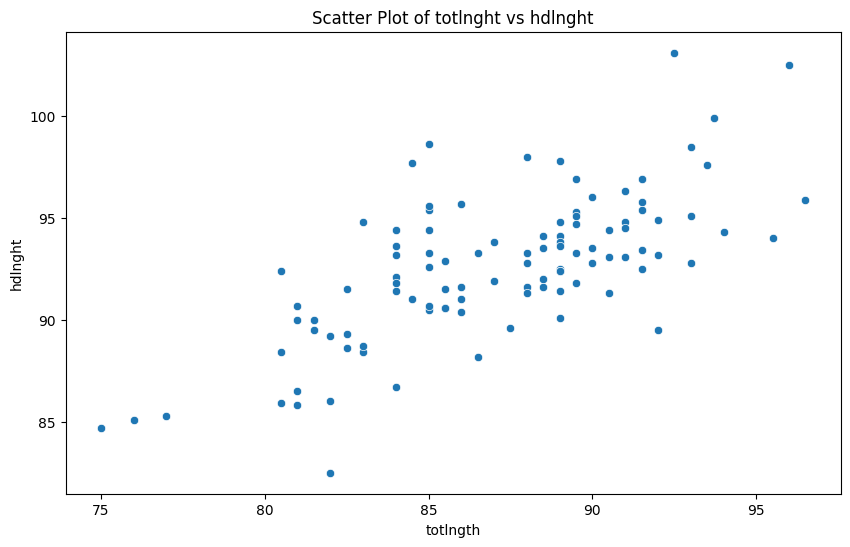

In [21]:
#### 1.3.2 graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.title('Scatter Plot of totlnght vs hdlnght')
plt.xlabel('totlngth')
plt.ylabel('hdlnght')
plt.show()


# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.2'] = 2

#### 1.3.3 Your comments on the relationship between `x` and `y` here in this cell

There definitely seems to be a relationship betwen totlnght and hdlnght. The relationship seems to be linear.

In [22]:
#### 1.3.3 score from markdown above
#There definitely seems to be a relationship betwen totlnght and hdlnght. The relationship seems to be linear.
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.3'] = 2

In [23]:
#### 1.3.4 reshape x
X = x.reshape(-1, 1)

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.4'] = 1

In [25]:
#### 1.3.5 split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.5'] = 2

## 1.4 Create, fit linear regression model and make predictions

1. Create a linear regression model using `LinearRegression`
2. Fit that model on the training data.
3. Predict using training data and store the results in `y_pred_train` and for testing data and store the results in `y_pred_test`.

In [26]:
#### 1.4.1 create model
linear_reg_model = LinearRegression()


# Leave the code in this cell below unchanged. Use print if output is desired
score['1.4.1'] = 1

In [27]:
#### 1.4.2 fit model
linear_reg_model.fit(X_train, y_train)


# Leave the code in this cell below unchanged. Use print if output is desired
score['1.4.2'] = 2

In [28]:
#### 1.4.3 predict 
y_pred_train = linear_reg_model.predict(X_train)
y_pred_test = linear_reg_model.predict(X_test)


# Leave the code in this cell below unchanged. Use print if output is desired
score['1.4.3'] = 2

## 1.5 Evaluate the model (error)

We need to evaluate the model to see how well it performs. We will use the bias (mean), the mean square error. We will plot the fit and a histogram of the residuals.

1. Compute the min and max for all the data x and store them `x_min` and `x_max` respectively. Use `np.min` and `np.max`. Use `linspace` to create a range of values from 'x_min' to 'x_max' and store them in `x_samps`. Use `num=100` to get 100 samples. Use `reshape(-1,1)` to turn `x_samps` into a column vector and then use the model to predict the values and store them in `y_samps`.
2. Plot the fit of the model. Use seaborn to scatter plot the 'X_train' vs 'y_train' with green dots, 'X_test' vs 'y_test' with blue 'x's, and 'x_samps' vs 'y_samps' with a red line using seaborn's `lineplot`. Make sure to label the axes and add a legend.
3. Calculate the training and testing residuals and store them in `train_residuals` and `test_residuals` respectively.
4. Compute the bias (mean) of the training and testing residuals and store them in `train_bias` and `test_bias` respectively and print them.
5. Compute the mean squared error of the training and testing residuals and store them in `train_mse` and `test_mse` respectively and print them.
6. Plot the histogram of the training and testing residuals using seaborn's `distplot` with 20 bins. Make sure to label the axes and add a legend.


In [30]:
#### 1.5.1 predict
x_min = np.min(x)
x_max = np.max(x)

# Create a range of values from x_min to x_max
x_samps = np.linspace(x_min, x_max, num=100).reshape(-1, 1)

# Predict the values using the model
y_samps = linear_reg_model.predict(x_samps)

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.5.1'] = 2

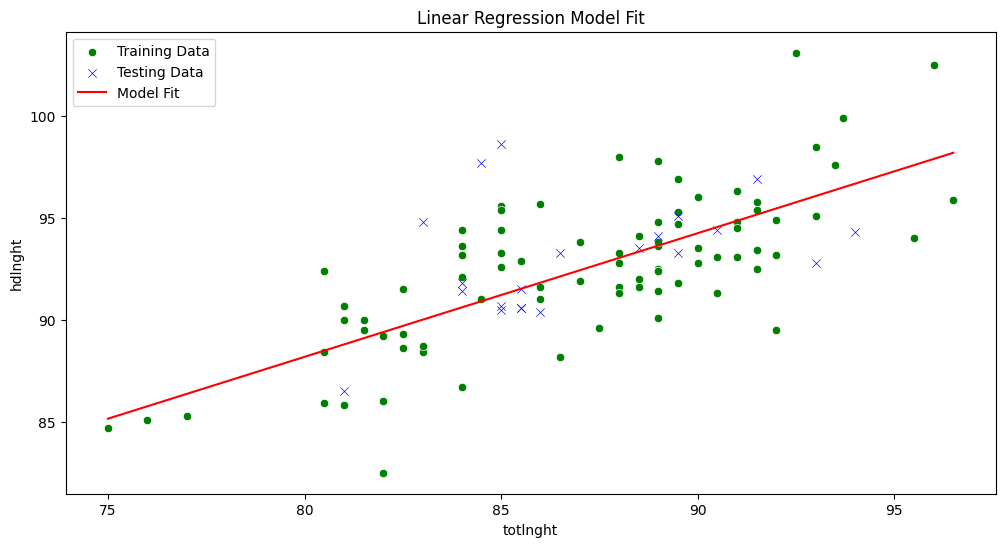

In [31]:
#### 1.5.2 plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, color='green', label='Training Data')
sns.scatterplot(x=X_test.flatten(), y=y_test, marker='x', color='blue', label='Testing Data')
sns.lineplot(x=x_samps.flatten(), y=y_samps, color='red', label='Model Fit')
plt.title('Linear Regression Model Fit')
plt.xlabel('totlnght')
plt.ylabel('hdlnght')
plt.legend()
plt.show()


# Leave the code in this cell below unchanged. Use print if output is desired
score['1.5.2'] = 3

In [36]:
#### 1.5.3 compute the residuals
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.5.3'] = 2

In [37]:
#### 1.5.4 compute the bias
train_bias = np.mean(train_residuals)
test_bias = np.mean(test_residuals)
print("Training Bias:", train_bias)
print("Testing Bias:", test_bias)


# Leave the code in this cell below unchanged. Use print if output is desired
score['1.5.4'] = 1

Training Bias: -5.47888374562005e-15
Testing Bias: 0.5891043840968523


In [38]:
#### 1.5.5 compute the mean square error
train_mse = mse(y_train, y_pred_train)
test_mse = mse(y_test, y_pred_test)
print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)



# Leave the code in this cell below unchanged. Use print if output is desired
score['1.5.5'] = 2

Training Mean Squared Error: 6.416685801344379
Testing Mean Squared Error: 7.529187604986788


/tmp/ipykernel_5732/265088561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_residuals, bins=20, label='Training Residuals')
/tmp/ipykernel_5732/265088561.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_residuals, bins=20, label='Testing Residuals')


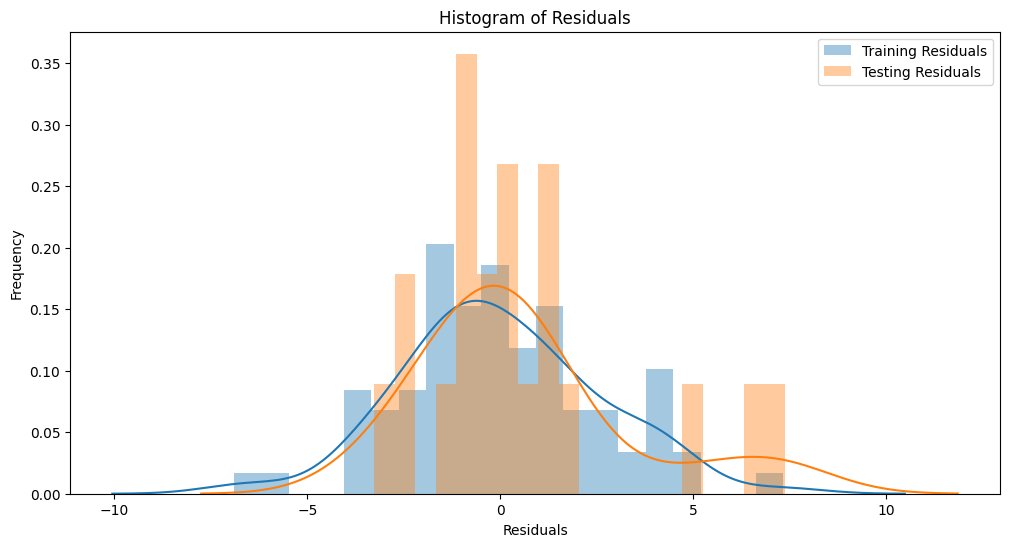

In [39]:
#### 1.5.6 histogram of the residuals
plt.figure(figsize=(12, 6))
sns.distplot(train_residuals, bins=20, label='Training Residuals')
sns.distplot(test_residuals, bins=20, label='Testing Residuals')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Leave the code in this cell below unchanged. Use print if output is desired
score['1.5.6'] = 3

In [40]:
sum(score.values())

30